In [61]:
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools

Мы берем датасет из https://grouplens.org/datasets/movielens/ достаточно маленький, чтобы построить и обучить модель, не затрачивая много ресурсов компьютера

In [62]:
#Импортируем датасет movie
movies=pd.read_csv(r'C:\Users\Admin\Desktop\movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [63]:
#Импортируем датасет user
user=pd.read_csv(r'C:\Users\Admin\Desktop\ratings.csv')
user.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Сколько записей мы имеем в каждой таблице рейтингов и фильмов?

In [64]:
movies.shape

(9742, 3)

In [65]:
user.shape

(100836, 4)

In [66]:
print(' Датасет содержит: ', len(user), ' рейтингов ', len(movies), ' фильмов.')

 Датасет содержит:  100836  рейтингов  9742  фильмов.


In [67]:
# Пользователь 1 имеет такое среднее значение рейтинга
user[user['userId']==1].rating.mean()

4.366379310344827

Рассчитаем средний рейтинг на пользователя

In [68]:
mean_rating_per_user = user.groupby(['userId']).mean().reset_index()
mean_rating_per_user['mean_rating'] = mean_rating_per_user['rating']

mean_rating_per_user.drop(['movieId','rating','timestamp'],axis=1, inplace=True)

In [69]:
mean_rating_per_user.head(10)

,userId,mean_rating
0,1,4.366379
1,2,3.948276
2,3,2.435897
3,4,3.555556
4,5,3.636364
5,6,3.493631
6,7,3.230263
7,8,3.574468
8,9,3.260870
9,10,3.278571


Объеденим две таблицы

In [70]:
user = pd.merge(user,mean_rating_per_user,on=['userId','userId'])

In [71]:
user.head()

,userId,movieId,rating,timestamp,mean_rating
0,1,1,4.0,964982703,4.366379
1,1,3,4.0,964981247,4.366379
2,1,6,4.0,964982224,4.366379
3,1,47,5.0,964983815,4.366379
4,1,50,5.0,964982931,4.366379


In [72]:
user = user.drop(user[user.rating < user.mean_rating].index)

In [76]:
# у пользователя 4 просмотренных фильмов больше 100

user[user['userId']== 4]

,userId,movieId,rating,timestamp,mean_rating
306,4,106,4.0,986848784,3.555556
307,4,125,5.0,964622758,3.555556
309,4,162,5.0,945078571,3.555556
311,4,176,5.0,964622565,3.555556
313,4,215,5.0,945079078,3.555556
...,...,...,...,...,...
507,4,4347,4.0,1007569586,3.555556
511,4,4765,5.0,1007569445,3.555556
513,4,4896,4.0,1007574532,3.555556
514,4,4902,4.0,1007569465,3.555556


In [77]:
user.drop(['timestamp'],axis=1,inplace=True)

In [78]:
print(user.shape)

(54732, 4)


In [79]:
user["userId"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [80]:
# Объединим 2 датасета
mergedata = pd.merge(movies,user,on=['movieId','movieId'])
mergedata.head(10)

,movieId,title,genres,userId,rating,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,3.636364
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,3.230263
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,4.209524
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,2.607397
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,3.260722
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,3.920000
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,40,5.0,3.766990
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,43,5.0,4.552632
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45,4.0,3.875940
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,46,5.0,4.000000


In [81]:
len(mergedata['movieId'].unique())

7141

In [82]:
len(movies['movieId'].unique())

9742

Вычислим перекрестную таблицу

In [83]:
user_movie = pd.crosstab(mergedata['userId'], mergedata['title'])
user_movie.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zootopia (2016),Zulu (1964),[REC] (2007),[REC]² (2009),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
user_movie.shape

(610, 7138)

Применим метод главных компонент (PCA) — 
 для снижения размерности данных и 
проекции их на ортогональное подпространство признаков.

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_movie)
pca_samples = pca.transform(user_movie)

In [87]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,1.557887,1.025345,-1.523450
1,-1.773112,-0.665442,0.558527
2,-2.160588,0.072811,0.061509
3,0.823215,2.578832,0.229109
4,-1.689254,0.476268,-0.373077


In [25]:
tocluster = pd.DataFrame(ps[[0,1,2]])

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

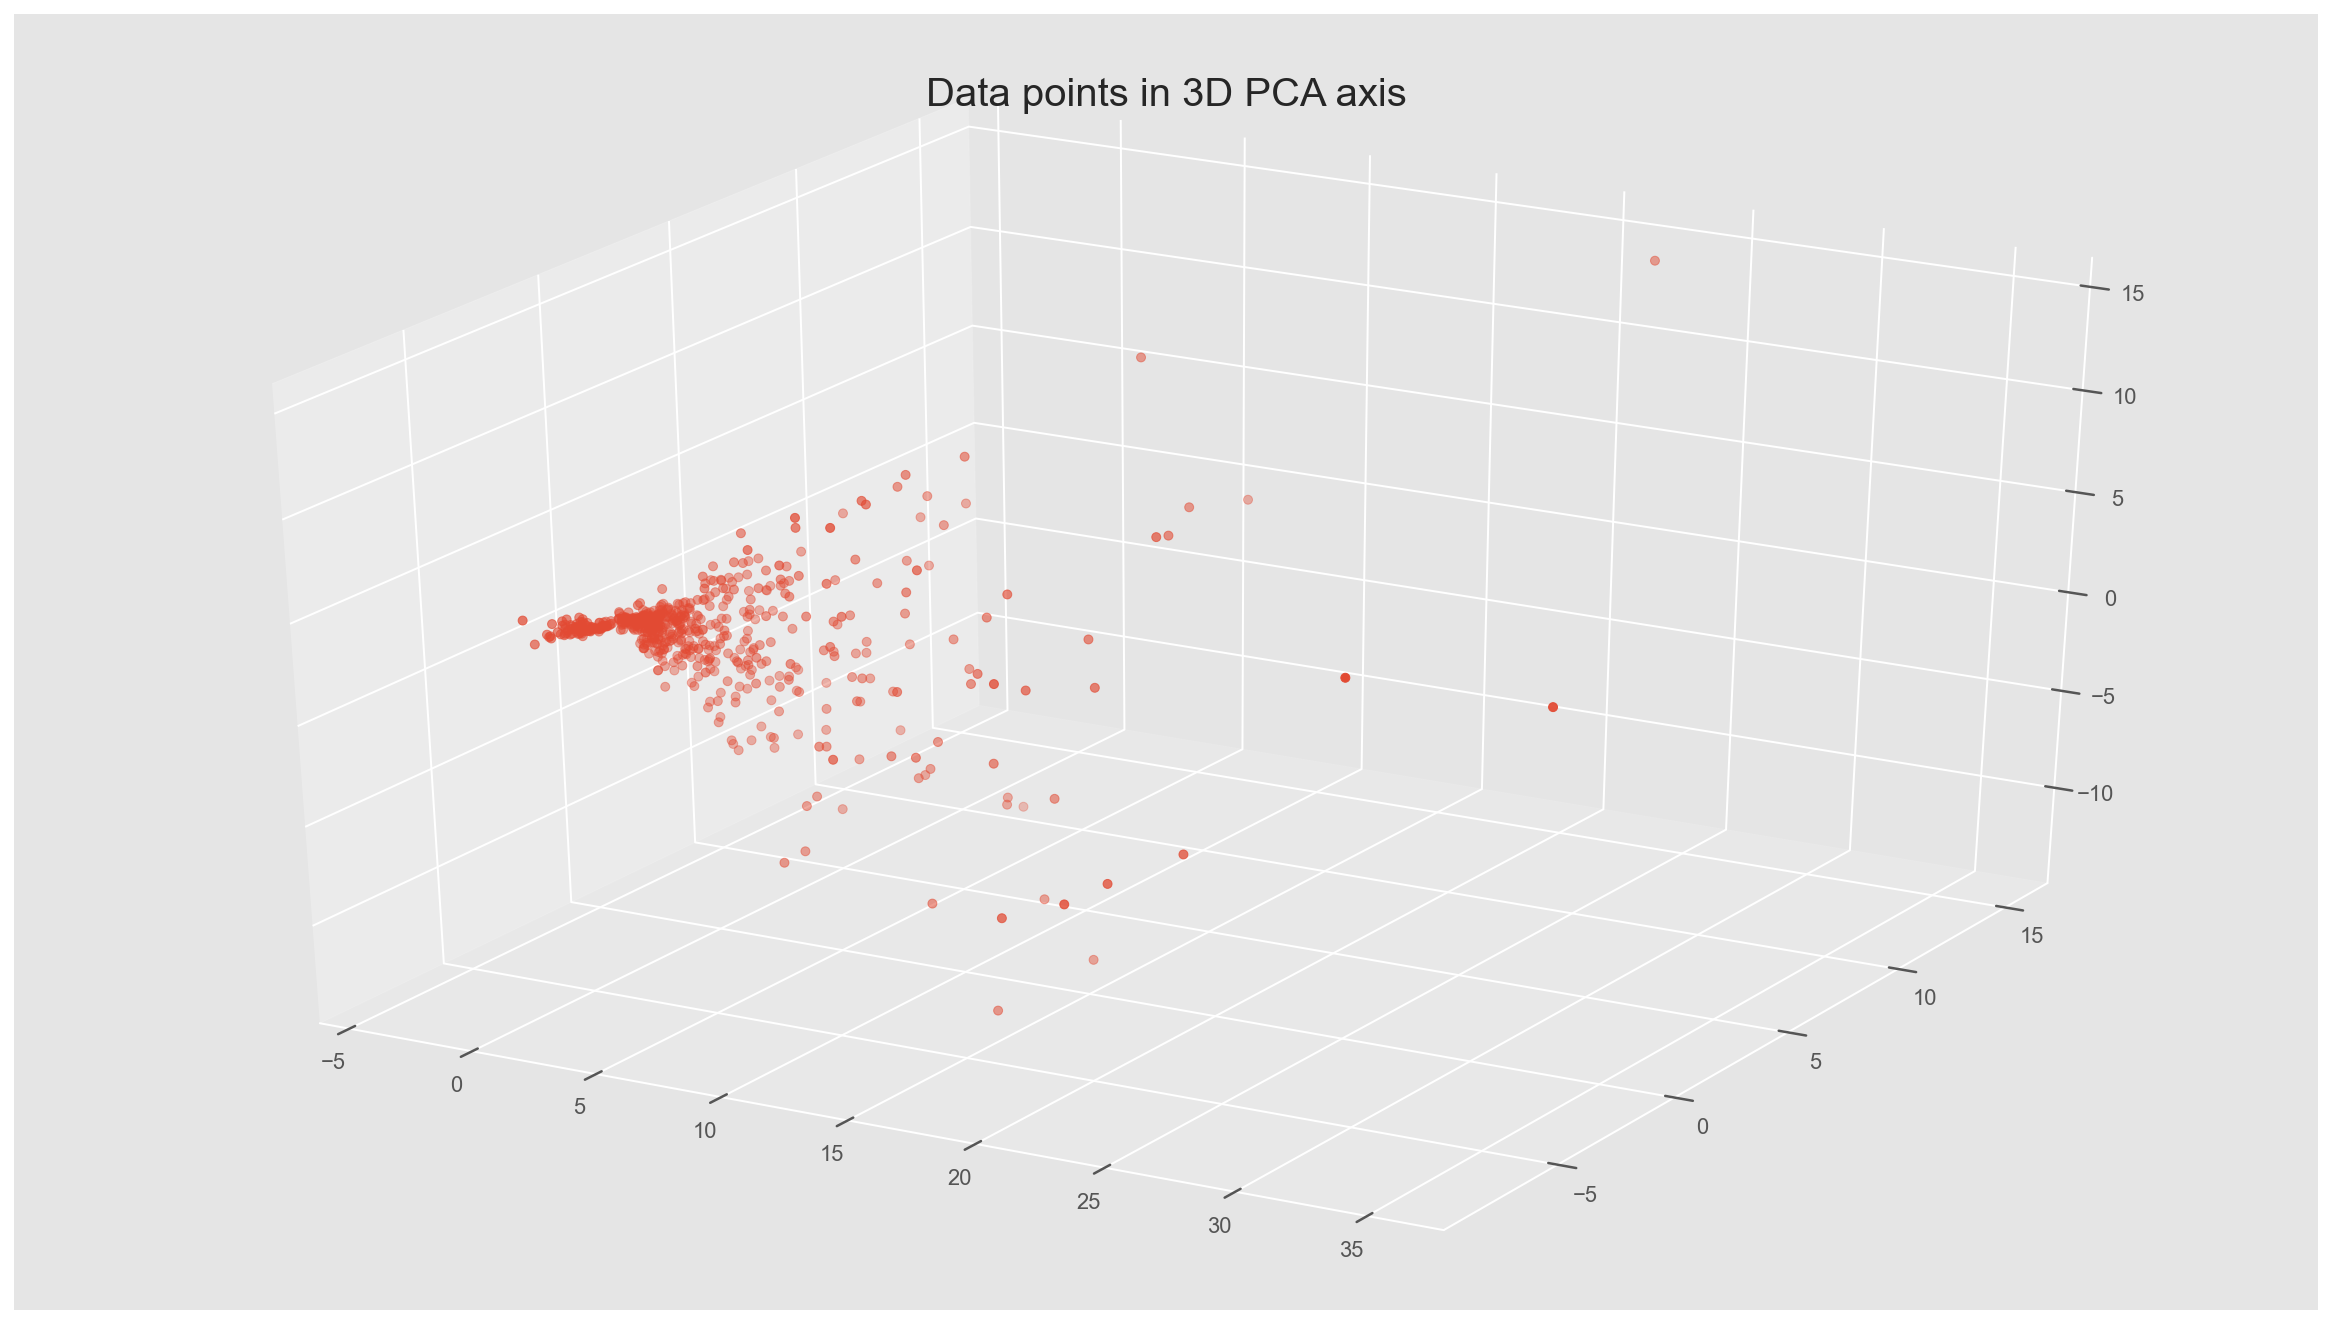

In [27]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

Применим алгоритм для кластеризации KMeans и метрику silhoutte_score.
Значение силуэта-это мера того, насколько объект похож на свой собственный кластер (когезия) 
по сравнению с другими кластерами (разделение). 
Силуэт колеблется от -1 до +1, где высокое значение указывает на то, 
что объект хорошо соответствует своему собственному кластеру и плохо соответствует соседним кластерам. 

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

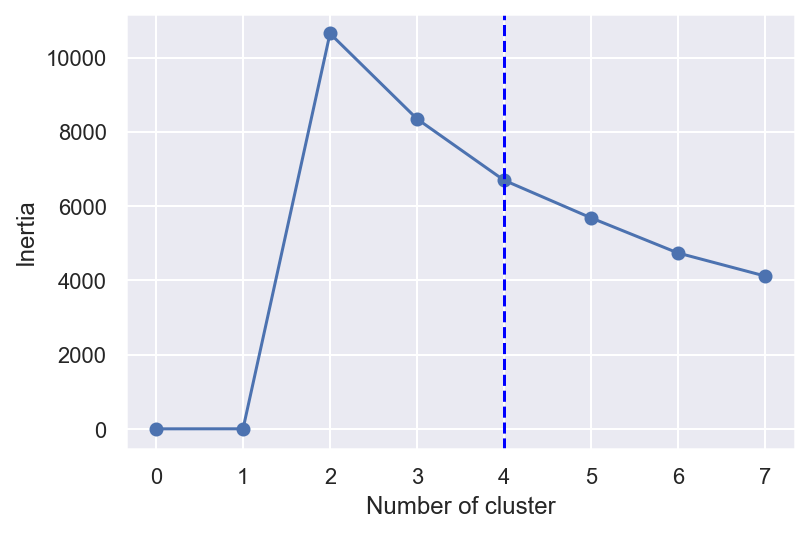

In [89]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

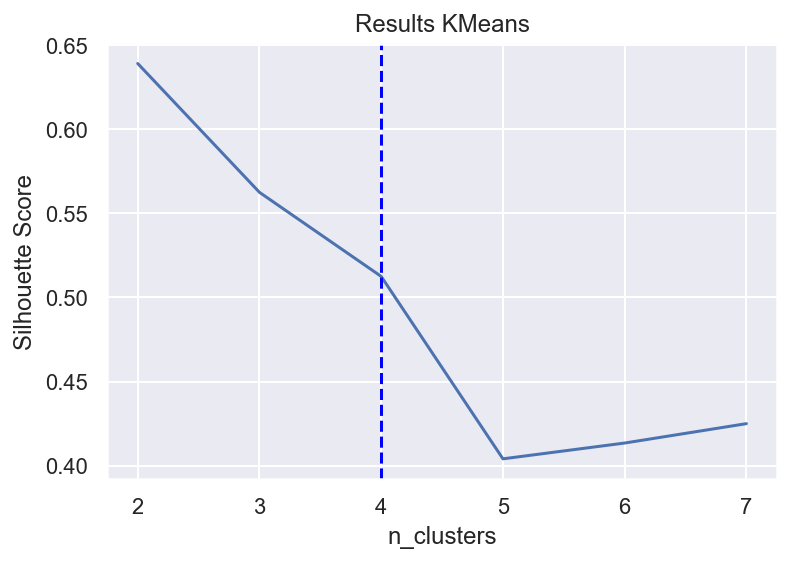

In [90]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

In [91]:
from sklearn.cluster import KMeans
#Разделим на 4 кластера и найдем их центры в 3-мерном и 2-мерном пространстве
clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-1.91561846  0.24590006 -0.12679656]
 [ 3.37793004 -2.77340142  0.52494062]
 [17.72692168 -3.14679618 -3.48463025]
 [ 8.0511872   4.93171984  1.95634411]]


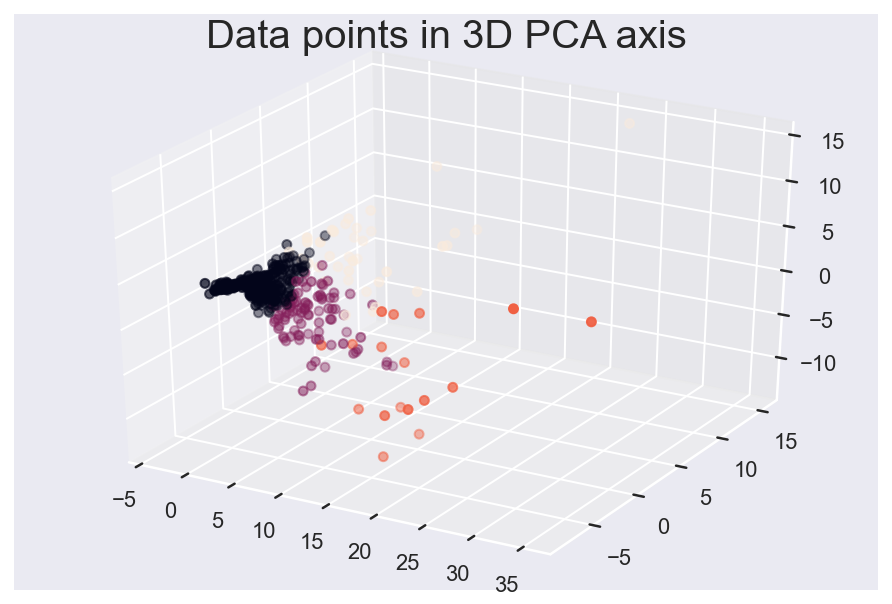

In [92]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

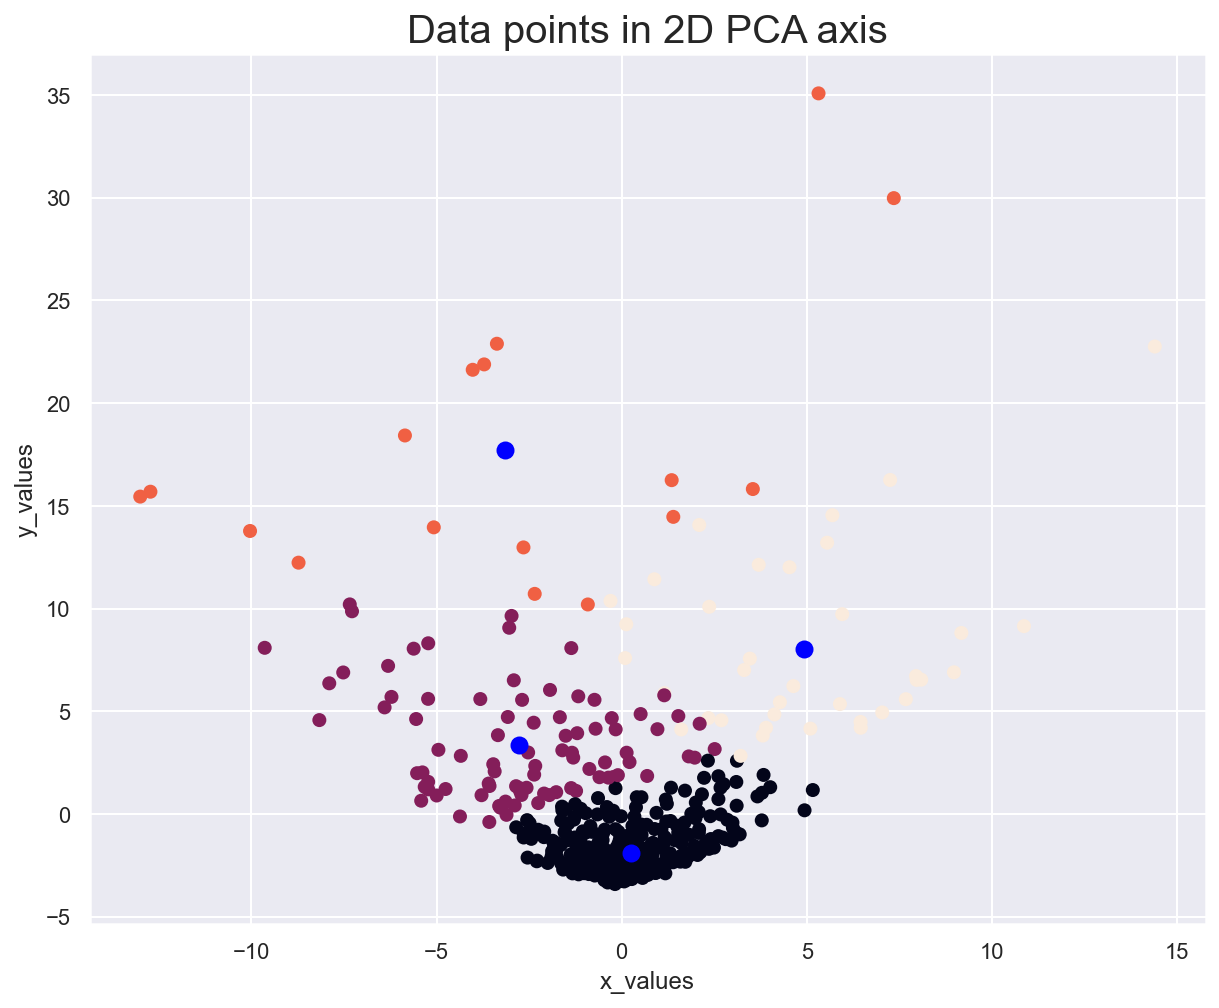

In [93]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='blue', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

Определим какой пользователь какому кластеру относится

In [94]:
user_movie['cluster'] = c_preds
user_movie

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),...,Zookeeper (2011),Zoolander (2001),Zootopia (2016),Zulu (1964),[REC] (2007),[REC]² (2009),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986),cluster
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,2


In [95]:
user_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Columns: 7139 entries, '71 (2014) to cluster
dtypes: int32(1), int64(7138)
memory usage: 33.2 MB


In [57]:
c0 = user_movie[user_movie['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_movie[user_movie['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_movie[user_movie['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_movie[user_movie['cluster']==3].drop('cluster',axis=1).mean()

Выведем топ-15 фильмов, которые объяснят характерные особенности этого кластера

In [38]:
c0.sort_values(ascending=False)[0:15]

title
Shawshank Redemption, The (1994)             0.450855
Forrest Gump (1994)                          0.433761
Pulp Fiction (1994)                          0.425214
Silence of the Lambs, The (1991)             0.386752
Braveheart (1995)                            0.331197
Matrix, The (1999)                           0.326923
Schindler's List (1993)                      0.314103
Jurassic Park (1993)                         0.307692
Star Wars: Episode IV - A New Hope (1977)    0.286325
Apollo 13 (1995)                             0.286325
Terminator 2: Judgment Day (1991)            0.282051
Fugitive, The (1993)                         0.262821
Toy Story (1995)                             0.252137
Batman (1989)                                0.252137
Usual Suspects, The (1995)                   0.245726
dtype: float64

In [39]:
c1.sort_values(ascending=False)[0:15]

title
Forrest Gump (1994)                                              0.863636
Matrix, The (1999)                                               0.840909
Shrek (2001)                                                     0.761364
Lord of the Rings: The Fellowship of the Ring, The (2001)        0.750000
Fight Club (1999)                                                0.738636
Lord of the Rings: The Two Towers, The (2002)                    0.738636
Star Wars: Episode IV - A New Hope (1977)                        0.738636
Shawshank Redemption, The (1994)                                 0.727273
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    0.715909
Dark Knight, The (2008)                                          0.715909
Lord of the Rings: The Return of the King, The (2003)            0.715909
Star Wars: Episode V - The Empire Strikes Back (1980)            0.693182
Gladiator (2000)                                                 0.659091
Monsters, Inc. (2001)           

In [59]:
c2.sort_values(ascending=False)[0:15]

title
Die Hard (1988)                                          1.0
Monsters, Inc. (2001)                                    1.0
Star Wars: Episode V - The Empire Strikes Back (1980)    1.0
Star Wars: Episode IV - A New Hope (1977)                1.0
X-Men (2000)                                             1.0
Star Wars: Episode I - The Phantom Menace (1999)         1.0
Independence Day (a.k.a. ID4) (1996)                     1.0
Incredibles, The (2004)                                  1.0
Toy Story (1995)                                         1.0
Kill Bill: Vol. 2 (2004)                                 1.0
Fight Club (1999)                                        1.0
Kill Bill: Vol. 1 (2003)                                 1.0
V for Vendetta (2006)                                    1.0
Matrix, The (1999)                                       1.0
Spider-Man 2 (2004)                                      1.0
dtype: float64

In [60]:
c3.sort_values(ascending=False)[0:15]

title
Pulp Fiction (1994)                                                               0.945946
Star Wars: Episode IV - A New Hope (1977)                                         0.945946
Matrix, The (1999)                                                                0.918919
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.918919
Forrest Gump (1994)                                                               0.918919
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.918919
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.891892
American Beauty (1999)                                                            0.891892
Indiana Jones and the Temple of Doom (1984)                                       0.891892
Men in Black (a.k.a. MIB) (1997)                                                  0.891892
Groundhog Day (1993)                                                              0.

На основе этих кластеров и мы предлагаем пользователю, который относится к тому же кластеру, фильмы.